In [1]:
import geopandas
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fire = pd.read_csv("8d76ac6b-5ae8-4428-82a4-043130d17b02.csv")



In [3]:
fire.tail(7)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
10466,19042,F250028560,113.0,"Cooking fire, confined to container","5700 BLOCK BUNKERHILL ST, PITTSBURGH PA",1,2025-03-27T12:00:23,231EN07,1102.0,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.479284,-79.919431
10467,19043,F250028766,150.0,"Outside rubbish fire, Other","5800 BLOCK STANTON AVE, PITTSBURGH PA",0,2025-03-27T23:23:21,231EN07,1102.0,East Liberty,9.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.470099,-79.923035
10468,19075,F250030154,151.0,"Outside rubbish, trash or waste fire","1000 BLOCK WOODS RUN AVE, PITTSBURGH PA",0,2025-04-01T14:51:50,231EN35,2715.0,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,40.478955,-80.027624
10469,19076,F250030188,142.0,Brush or brush-and-grass mixture fire,"1000 BLOCK FT DUQUESNE BLVD, PITTSBURGH PA",0,2025-04-01T16:06:50,231EN03,201.0,Central Business District,6.0,2.0,4.200302e+10,6.0,2.0,2.0,1-3,40.445519,-79.995248
10470,19108,F250029317,142.0,Brush or brush-and-grass mixture fire,"1000 BLOCK ARLINGTON AVE, PITTSBURGH PA",0,2025-03-29T19:16:15,231EN27,1803.0,Allentown,3.0,18.0,4.200318e+10,5.0,18.0,3.0,4-5,40.424398,-79.988971
10471,19109,F250030412,113.0,"Cooking fire, confined to container","100 BLOCK S 15TH ST, PITTSBURGH PA",1,2025-04-02T11:03:59,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.427953,-79.983474
10472,19141,F250030803,151.0,"Outside rubbish, trash or waste fire","7000 BLOCK LEMINGTON AVE, PITTSBURGH PA",0,2025-04-03T15:18:48,231EN15,1201.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471387,-79.898188


These are the last seven neighborhoods within Pittsburgh that have experinced a fire of some type. Now let's see which neighborhoods has the most alarms. We can do this by using pandas and filtering the data, adding up the numbers in each neighborhood district instead of using the adresses. This would make reading the data easir.

In [4]:
number_alarms  = fire.groupby('neighborhood')['alarms'].count()
number_alarms

neighborhood
Allegheny Center        63
Allegheny West          43
Allentown              133
Arlington               54
Arlington Heights       13
                      ... 
Upper Lawrenceville     56
West End                23
West Oakland            65
Westwood                28
Windgap                 24
Name: alarms, Length: 91, dtype: int64

In this data, we can the total amount of alarms that had sounded in each neighborhood. Let's go from least to greatest to get a better sense of this data to see which neighborhood has the most and least amount of alarms. From there, we can clearly see which one's are the safest.

In [125]:
number_alarms = number_alarms.sort_values(ascending = True)
number_alarms

neighborhood
Mount Oliver Borough           7
Regent Square                  9
East Carnegie                 11
Ridgemont                     12
Mt. Oliver                    12
                            ... 
Hazelwood                    262
Squirrel Hill South          272
Central Business District    297
South Side Flats             304
Carrick                      317
Name: alarms, Length: 91, dtype: int64

Now that we have the amount of alarms in each neighborhood district, let's graph it so we could see the data more clearly and visible.

<Axes: xlabel='neighborhood'>

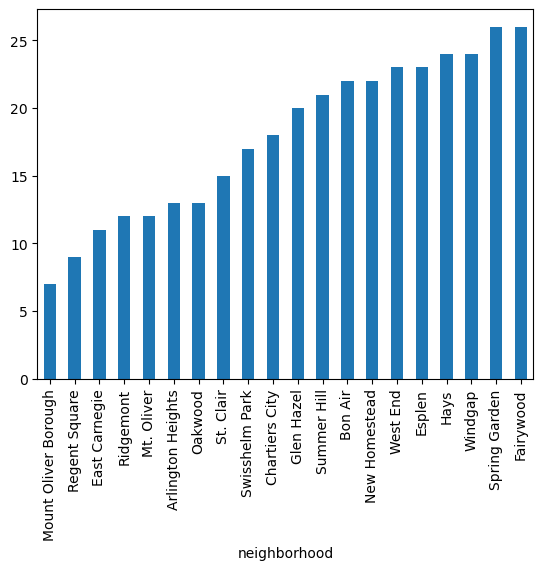

In [128]:
number_alarms[:20].plot.bar()

Now let's show this graphically by using a map.

<Axes: >

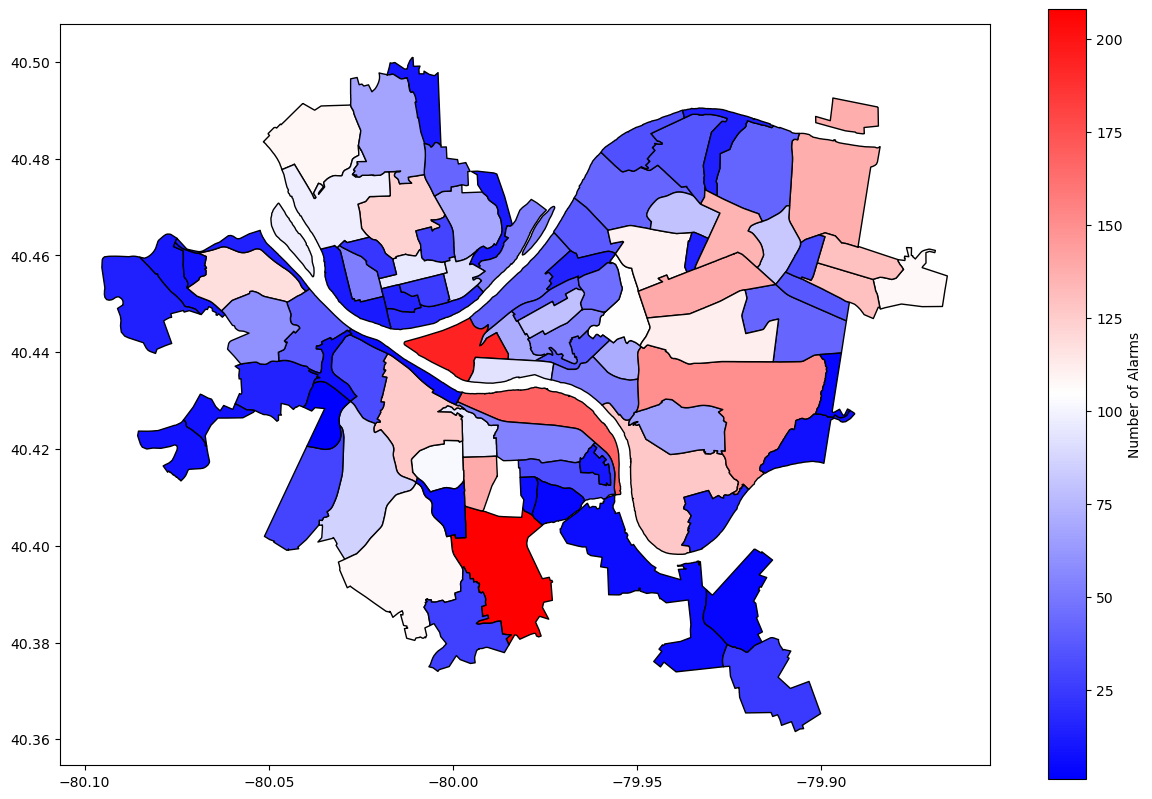

In [43]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
alarms = fire.groupby("neighborhood")['alarms'].sum().reset_index()
number_fires = neighborhoods.merge(alarms, how='left', left_on='hood', right_on='neighborhood')
number_fires.plot(column='alarms', cmap='bwr',  edgecolor="black", legend=True,legend_kwds={'label': "Number of Alarms"}, figsize=(15, 10), 
                  missing_kwds={"color": "light grey"} 
               )

### Conclusion ###

Overall, based on this data, we can say the safest neighborhoods are the ones with the lowest amount of alarms rang which is Mount Oliver Borough.
It has a total of 7 alarms which is less than the others. Based on the data, you could see most of the neighborhoods having a high number, which we can
deem them unsafe while Mount Oliver Borough can be seen as the safest within the fire data set.